In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
fs = 2.5e3
x = np.fromfile('doppler_corrected.c64', 'complex64')

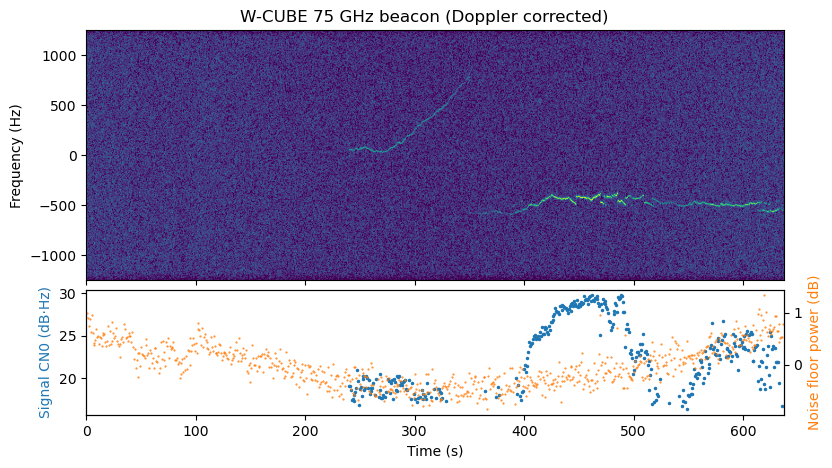

In [3]:
nfft = 1024
nint = 2

faxis = np.fft.fftshift(np.fft.fftfreq(nfft, 1 / fs))
T = nfft * nint / fs
w = np.blackman(nfft)
fx = np.fft.fftshift(np.abs(np.fft.fft(w * x[:x.size//nfft*nfft].reshape(-1, nfft)))**2, axes=1) / nfft
fx = np.average(fx[:fx.shape[0]//nint*nint].reshape(-1, nint, fx.shape[1]), axis=1)
taxis = np.arange(fx.shape[0]) * T

bin_max = np.argmax(fx, axis=1)
narrow_pwr = np.empty(fx.shape[0])
narrow_span = 25
wide_avoid = 75
for j in range(fx.shape[0]):
    narrow_pwr[j] = np.sum(fx[j, bin_max[j]-narrow_span:bin_max[j]+narrow_span+1])
wide_pwr = np.sum(fx[:, wide_avoid:-wide_avoid], axis=1)
noise_pwr = (wide_pwr - narrow_pwr) / (nfft - 2*wide_avoid - (2*narrow_span + 1))
sig_pwr = narrow_pwr - noise_pwr * (2*narrow_span + 1)
max_sig_pwr = np.max(sig_pwr)
sig_pwr[sig_pwr < max_sig_pwr * 10**(-13/10)] = np.nan
cn0 = 10 * np.log10(sig_pwr / (noise_pwr * T))
noise_pwr_db = 10 * np.log10(noise_pwr / np.average(noise_pwr))

fig, axs = plt.subplots(2, 1, figsize=(9, 5), sharex=True, height_ratios=[2, 1])
axs[0].imshow(10*np.log10(fx.T[::-1]), aspect='auto', vmin=-70, vmax=-45,
              extent=[0, fx.shape[0]*T, -fs/2, fs/2])
axs[1].plot(taxis, cn0, '.', markersize=3)
ax2 = axs[1].twinx()
ax2.plot(taxis, noise_pwr_db, '.', color='C1', markersize=1)
plt.suptitle('W-CUBE 75 GHz beacon (Doppler corrected)', y=0.92)
axs[-1].set_xlabel('Time (s)')
axs[0].set_ylabel('Frequency (Hz)');
axs[1].set_ylabel('Signal CN0 (dB·Hz)', color='C0')
ax2.set_ylabel('Noise floor power (dB)', color='C1')
plt.subplots_adjust(hspace=0.05)

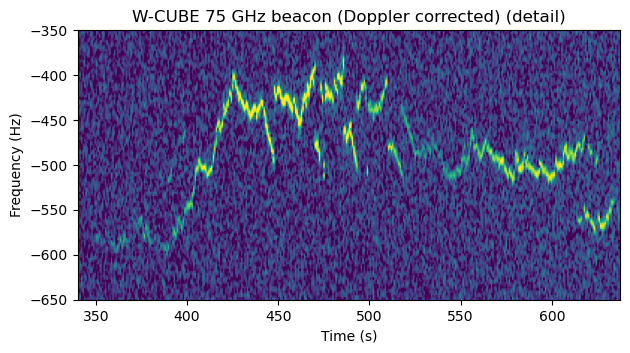

In [4]:
plt.imshow(10*np.log10(fx.T[::-1]), aspect='auto', vmin=-70, vmax=-45,
              extent=[0, fx.shape[0]*T, -fs/2, fs/2])
plt.xlim(340, fx.shape[0]*T)
plt.ylim(-650, -350)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('W-CUBE 75 GHz beacon (Doppler corrected) (detail)');